Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Modules.custom_funx import *
from Modules.plot_utils import *
import lmfit

Loading data 

In [2]:
dir_name = 'Data/Stroma/qh03/'
data = load_files(dir_name) 
data 

,x,y_10,y_13,y_16,y_19,y_22,y_25,y_28,y_31,y_34,...,y_58,y_61,y_64,y_67,y_70,y_73,y_76,y_79,y_82,y_85
0,3999.36053,-0.17960,-0.17990,-0.17950,-0.17895,-0.17816,-0.17707,-0.17574,-0.17391,-0.17168,...,-0.13577,-0.13275,-0.13009,-0.12680,-0.12108,-0.11415,-0.11001,-0.10737,-0.10521,-0.10301
1,3998.87839,-0.17959,-0.17989,-0.17949,-0.17893,-0.17815,-0.17705,-0.17573,-0.17389,-0.17166,...,-0.13576,-0.13274,-0.13008,-0.12679,-0.12107,-0.11414,-0.11000,-0.10736,-0.10521,-0.10300
2,3998.39625,-0.17958,-0.17987,-0.17947,-0.17891,-0.17813,-0.17704,-0.17571,-0.17388,-0.17165,...,-0.13575,-0.13273,-0.13007,-0.12678,-0.12106,-0.11413,-0.10999,-0.10735,-0.10519,-0.10299
3,3997.91411,-0.17956,-0.17985,-0.17945,-0.17890,-0.17812,-0.17703,-0.17569,-0.17386,-0.17163,...,-0.13573,-0.13271,-0.13006,-0.12677,-0.12105,-0.11412,-0.10998,-0.10734,-0.10518,-0.10298
4,3997.43197,-0.17954,-0.17984,-0.17944,-0.17888,-0.17810,-0.17701,-0.17568,-0.17384,-0.17161,...,-0.13572,-0.13270,-0.13005,-0.12676,-0.12104,-0.11411,-0.10997,-0.10733,-0.10517,-0.10297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,901.60388,1.13393,1.13605,1.13506,1.13390,1.13094,1.12849,1.12534,1.12183,1.11788,...,1.08309,1.08343,1.08328,1.08292,1.08193,1.08131,1.08172,1.08252,1.08390,1.08469
6426,901.12174,1.13340,1.13551,1.13451,1.13332,1.13038,1.12789,1.12474,1.12122,1.11724,...,1.08241,1.08276,1.08260,1.08225,1.08123,1.08062,1.08104,1.08183,1.08322,1.08399
6427,900.63960,1.13285,1.13494,1.13393,1.13273,1.12980,1.12729,1.12413,1.12058,1.11660,...,1.08173,1.08206,1.08191,1.08155,1.08053,1.07992,1.08034,1.08114,1.08253,1.08328
6428,900.15746,1.13230,1.13435,1.13335,1.13214,1.12920,1.12670,1.12351,1.11995,1.11598,...,1.08105,1.08137,1.08122,1.08086,1.07984,1.07922,1.07962,1.08044,1.08182,1.08257


Background Subtraction and data trimming

In [3]:
roi = np.array([(1347,1365),(1774,1800)]) # Region of interest for polynomial fit
trim_data,cor_spectra, bdata = correct_spectra(data,roi,pol_order = 3)
normSpectra = norm_spectra(trim_data)
normSpectra


,x,y_10,y_13,y_16,y_19,y_22,y_25,y_28,y_31,y_34,...,y_58,y_61,y_64,y_67,y_70,y_73,y_76,y_79,y_82,y_85
0,1799.83278,0.000306,0.000569,0.000585,0.000585,0.000583,0.000575,0.000560,0.000547,0.000534,...,0.000343,0.000317,0.000293,0.000267,0.000215,0.000149,0.000117,0.000077,0.000045,0.000019
1,1799.35063,0.000605,0.000596,0.000575,0.000568,0.000568,0.000562,0.000550,0.000539,0.000529,...,0.000383,0.000362,0.000342,0.000321,0.000279,0.000227,0.000202,0.000179,0.000150,0.000128
2,1798.86849,0.001343,0.000702,0.000635,0.000610,0.000603,0.000600,0.000580,0.000572,0.000565,...,0.000503,0.000487,0.000473,0.000470,0.000440,0.000403,0.000387,0.000381,0.000370,0.000378
3,1798.38635,0.002052,0.000808,0.000695,0.000653,0.000637,0.000627,0.000619,0.000604,0.000610,...,0.000609,0.000610,0.000601,0.000604,0.000587,0.000576,0.000569,0.000580,0.000586,0.000598
4,1797.90421,0.002391,0.000834,0.000685,0.000645,0.000622,0.000613,0.000607,0.000595,0.000593,...,0.000644,0.000661,0.000643,0.000663,0.000655,0.000658,0.000657,0.000672,0.000694,0.000722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1349.03083,0.002993,0.003246,0.003228,0.003191,0.003141,0.003099,0.003044,0.002994,0.002928,...,0.002819,0.002829,0.002851,0.002881,0.002917,0.002969,0.002998,0.003003,0.002998,0.002985
936,1348.54869,0.004550,0.004762,0.004733,0.004694,0.004647,0.004600,0.004554,0.004508,0.004438,...,0.004318,0.004325,0.004344,0.004342,0.004374,0.004424,0.004439,0.004420,0.004390,0.004326
937,1348.06655,0.006096,0.006279,0.006247,0.006207,0.006163,0.006121,0.006084,0.006031,0.005990,...,0.005912,0.005906,0.005912,0.005903,0.005922,0.005960,0.005962,0.005907,0.005839,0.005752
938,1347.58441,0.007522,0.007726,0.007702,0.007671,0.007639,0.007602,0.007585,0.007556,0.007522,...,0.007544,0.007526,0.007519,0.007493,0.007499,0.007525,0.007503,0.007425,0.007334,0.007197


Plotting data and visualization

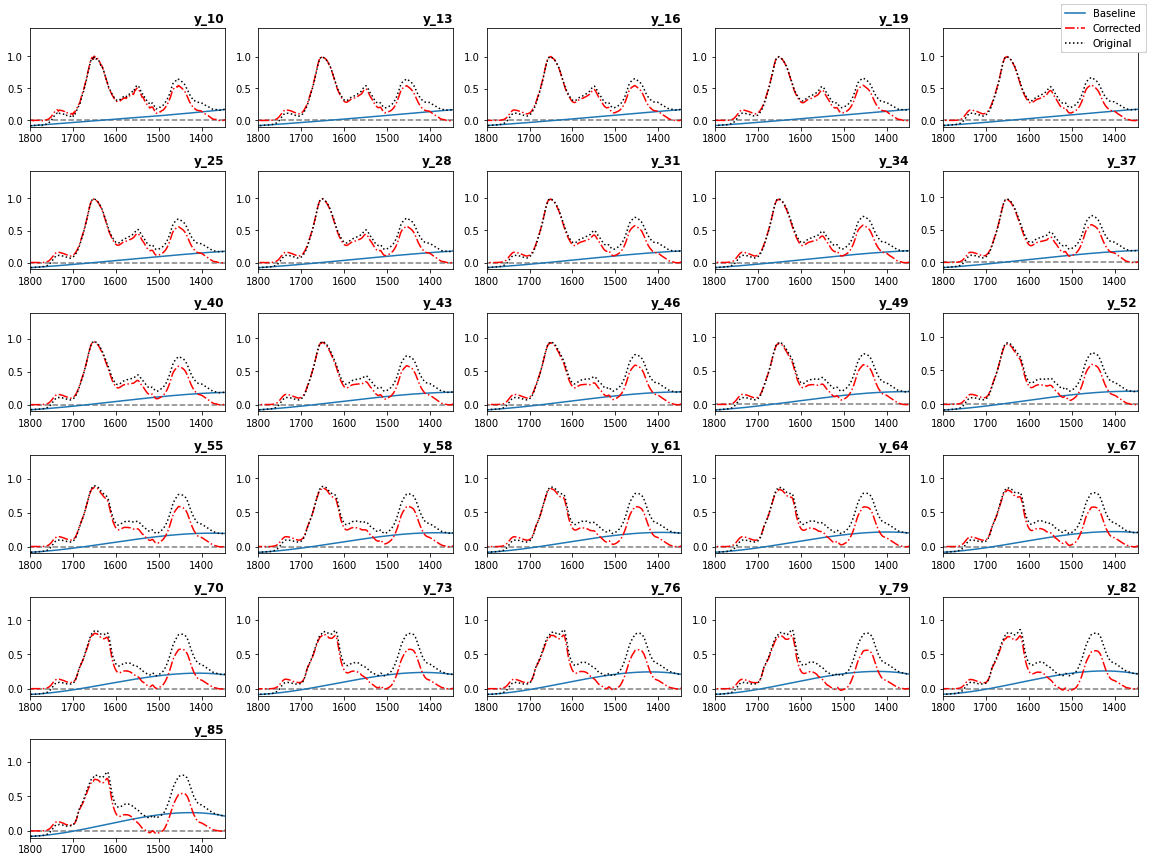

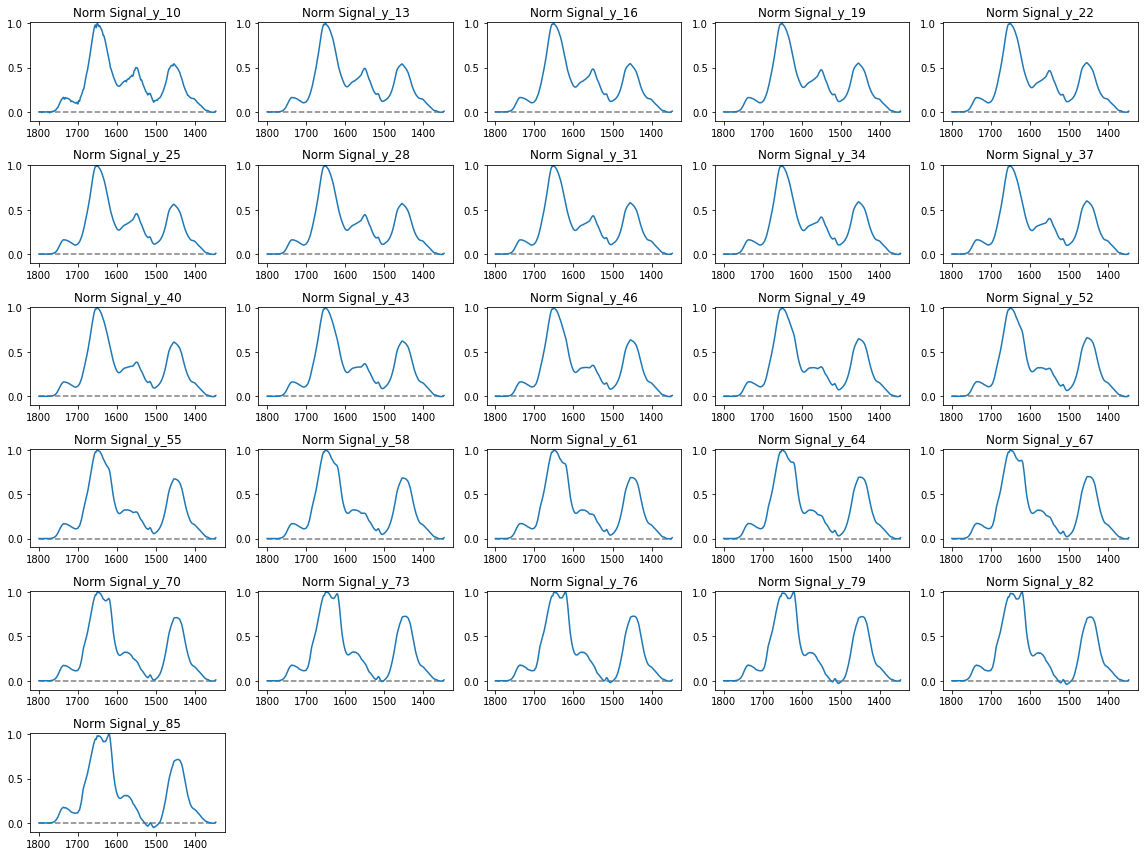

In [4]:
plot_spectral_corrections(data,cor_spectra,bdata,roi)
plot_norm_signals(normSpectra)
plt.show()

Fitting parameters (ATM - Any changes in the total number of fitting parameters, requires changes in the residual function, in newer release it is aimed towards simplified process.)

In [5]:
params = lmfit.Parameters()
#               (Name,  Value,   Vary,   Min,     Max,       Expr)
params.add_many(
                # Protein
                ('a1',   0.1,    True,    0,      0.2,      None), # Amplitude
                ('f1',   1740,   True,   1735,    1755,     None), # Frequency / Position 
                ('l1',   5,      True,    1,      50,       None), # FWHM

                ('a2',   0.04,    True,     0,      0.2,    None),   #Amplitude
                ('f2',   1725,   True,   1720,     1745,    None),
                ('l2',    5,    True,    1,       50,       None), 
                # Lipid
                ('a3',   0.9,    True,    0,       1,       None),  # Amplitude
                ('f3',   1654,   True,    1640,   1660,     None),
                ('l3',   20,     True,     10,     40,      None),

                ('a4',   0.9,    True,      0,      1,      None), # Amplitude
                ('f4',   1636,   True,   1630,    1650,     None),
                ('l4',   20,     True,     10,     80,      None), 
                
                ####
                ('a5',   0.3,    True,    0.0,     1,       None), # Amplitude
                ('f5',   1547,   True,    1592,    1505,    None),
                ('l5',   40,     True,     0,      100,     None),

                ('a6',   0.7,    True,     0.0,       1,    None), # Amplitude
                ('f6',   1453,   True,    1425,    1470,    None),
                ('l6',   20,     True,     0,      50,      None),   
                
                ('a7',   0.07,    True,     0.0,    1,      None), # Amplitude
                ('f7',   1378,   True,    1350,    1380,    None),
                ('l7',   10,     True,     0,      10,      None),   
                        
               )
print(params.pretty_print())

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a1       0.1        0      0.2     None     True     None     None
a2      0.04        0      0.2     None     True     None     None
a3       0.9        0        1     None     True     None     None
a4       0.9        0        1     None     True     None     None
a5       0.3        0        1     None     True     None     None
a6       0.7        0        1     None     True     None     None
a7      0.07        0        1     None     True     None     None
f1      1740     1735     1755     None     True     None     None
f2      1725     1720     1745     None     True     None     None
f3      1654     1640     1660     None     True     None     None
f4      1636     1630     1650     None     True     None     None
f5      1547     1505     1592     None     True     None     None
f6      1453     1425     1470     None     True     None     None
f7      1378     1350     1380     None     True     None 

Run fit

In [6]:
df_stats, df_variables, df_residual, df_plot = run_multifit(normSpectra,params, algo = 'leastsq', message = True)

Spectra(Y) at temp.y_10..completed with stats:[Chisqr value]:y_10    0.521497
Name: chisqr, dtype: float64 ,[reduced_Chi] value: y_10    0.000567
Name: redchi, dtype: float64 ,[Number of evaluation]:y_10    157
Name: num_func_eval, dtype: int64,LMFIT messagey_10    Fit succeeded.
Name: message, dtype: objecty_10    True
Name: success, dtype: bool
Spectra(Y) at temp.y_13..completed with stats:[Chisqr value]:y_13    0.516603
Name: chisqr, dtype: float64 ,[reduced_Chi] value: y_13    0.000562
Name: redchi, dtype: float64 ,[Number of evaluation]:y_13    113
Name: num_func_eval, dtype: int64,LMFIT messagey_13    Fit succeeded.
Name: message, dtype: objecty_13    True
Name: success, dtype: bool
Spectra(Y) at temp.y_16..completed with stats:[Chisqr value]:y_16    0.469453
Name: chisqr, dtype: float64 ,[reduced_Chi] value: y_16    0.000511
Name: redchi, dtype: float64 ,[Number of evaluation]:y_16    135
Name: num_func_eval, dtype: int64,LMFIT messagey_16    Fit succeeded.
Name: message, dtype:

Post processing and plotting

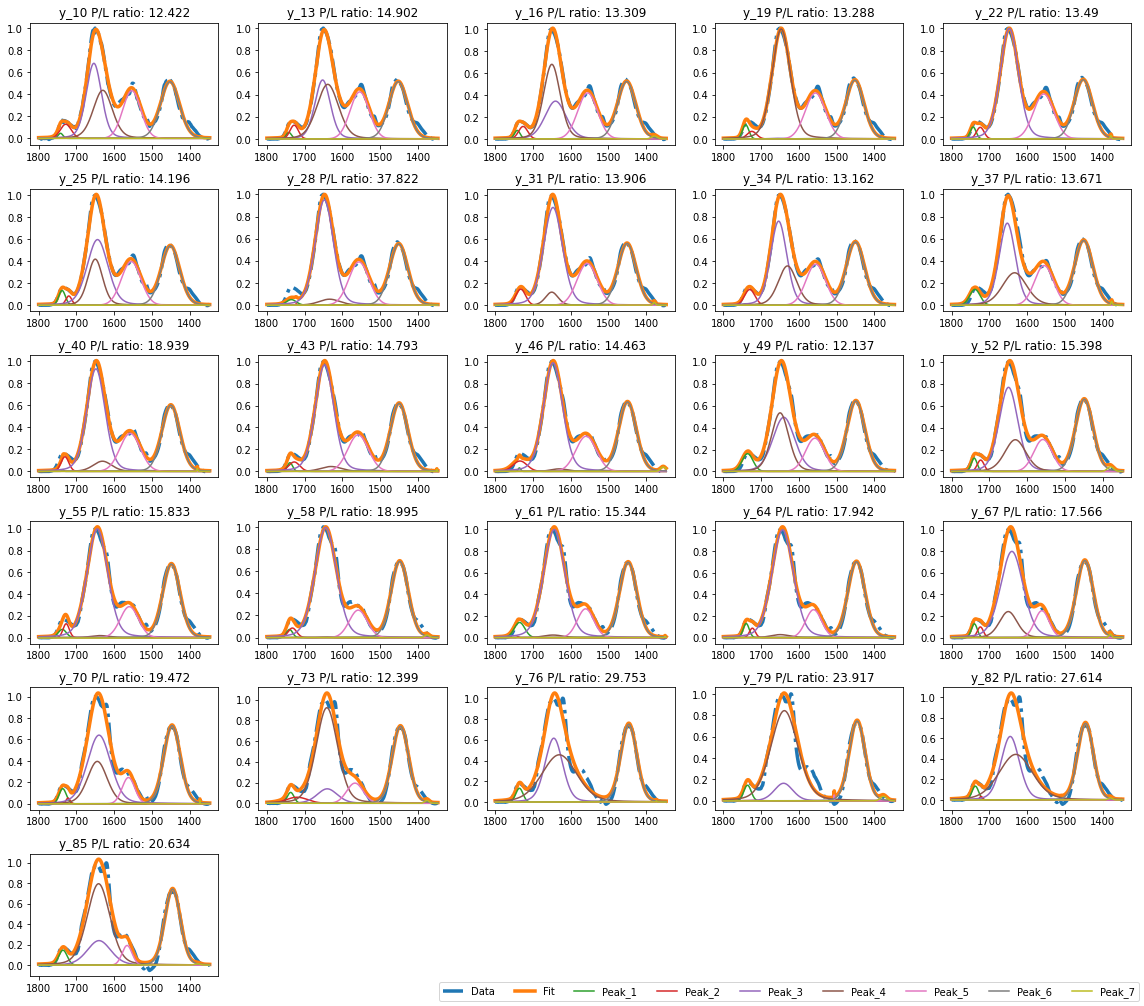

In [7]:
ratio = protein_to_lipid(df_plot,normSpectra['x'])
# print(ratio)
plot_fitres(df_plot,normSpectra['x'],ratio=ratio)  
plt.show()

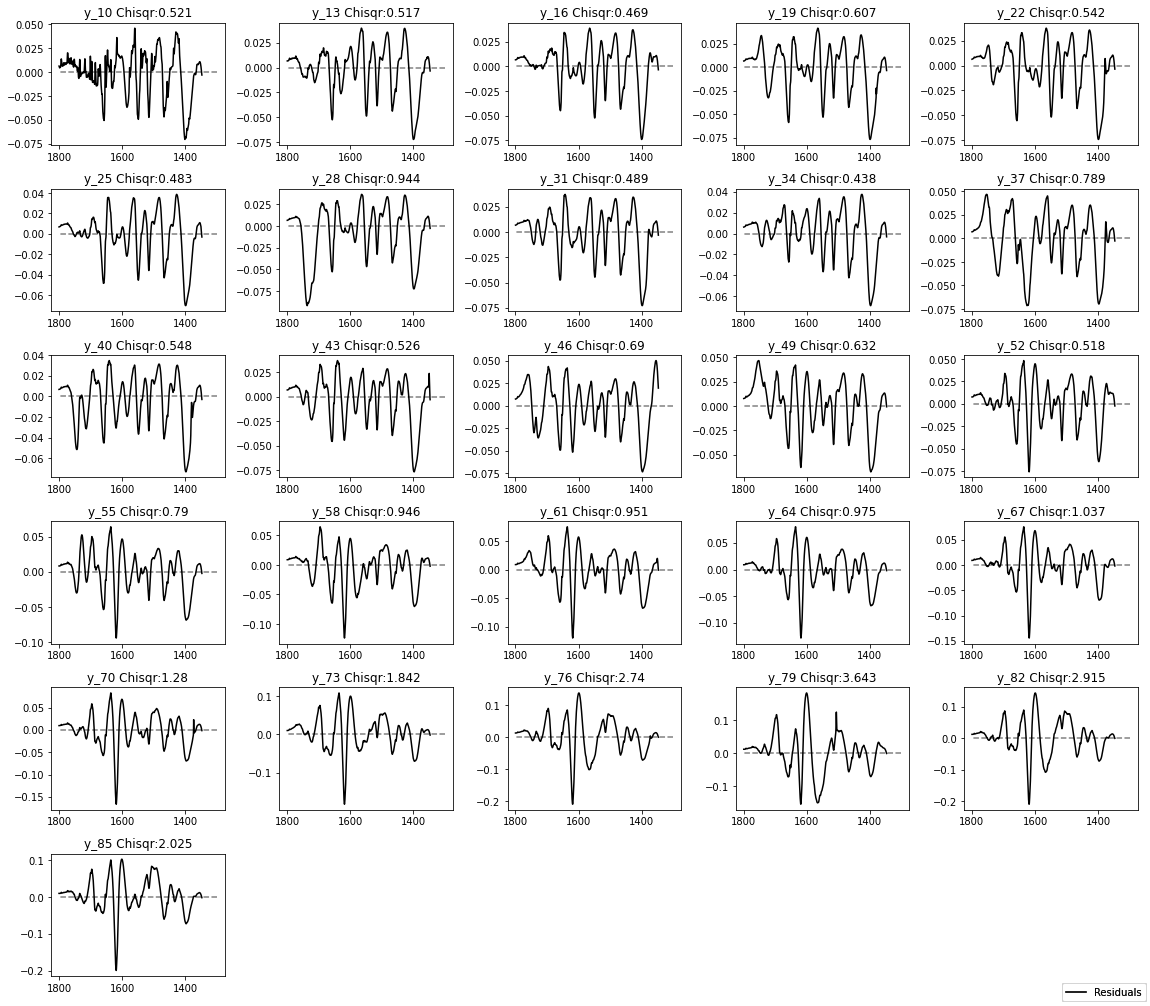

In [8]:
plot_residuals(df_residual,df_stats)
plt.show()